<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/%E2%80%9C0322_1043_Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [ ]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [ ]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

In [ ]:
from shapely.geometry import  Point
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import re

!pip install contextily
import contextily as ctx

!pip install geoplot
import geoplot as gplt
import lightgbm as lgb
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt

!pip install pdpbox
from pdpbox import pdp, info_plots   # get_dataset

!pip install shap
import shap

In [ ]:
if not os.path.exists("crime_data_2023.csv"):
    !gdown 1C2t0DbgCBBd_KfCFKFETCKi-ow0yiZWK

if not os.path.exists("crime_data_2022.csv"):              #  https://drive.google.com/file/d/1fsagc1icsyHcPjylwOyIO5lZVxiEn8ck/view?usp=drive_link
    !gdown 1fsagc1icsyHcPjylwOyIO5lZVxiEn8ck

if not os.path.exists("crime_data_2021.csv"):             #  https://drive.google.com/file/d/13s7teURWo0_Ew0h8QZIrCtXN4Zkl949m/view?usp=drive_link
    !gdown 13s7teURWo0_Ew0h8QZIrCtXN4Zkl949m

if not os.path.exists("crime_data_2020.csv"):             # https://drive.google.com/file/d/1PzCvWW7NVD3JsQJoFxLMcmEpInB_3C4q/view?usp=drive_link
    !gdown 1PzCvWW7NVD3JsQJoFxLMcmEpInB_3C4q

if not os.path.exists("crime_data_2019.csv"):             # https://drive.google.com/file/d/1wApg9zeTc_ULOykrDzls_sWtxzQg09Nr/view?usp=drive_link
    !gdown 1wApg9zeTc_ULOykrDzls_sWtxzQg09Nr

In [ ]:
df1 = (
    pd.read_csv('crime_data_2023.csv',parse_dates=['dispatch_date'])
)

df2 = (
    pd.read_csv('crime_data_2022.csv',parse_dates=['dispatch_date'])
)

df3 = (
    pd.read_csv('crime_data_2021.csv',parse_dates=['dispatch_date'])
)

df4 = (
    pd.read_csv('crime_data_2020.csv',parse_dates=['dispatch_date'])
)

df5 = (
    pd.read_csv('crime_data_2019.csv',parse_dates=['dispatch_date'])
)

In [ ]:
df_raw_crime = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

df_raw_crime

# df_raw_crime.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid',  'dc_key', 'dc_dist', 'psa', 'ucr_general', 'lat', 'lng'], axis=1, inplace=True)
df_raw_crime.rename(columns= {'point_x':'X', 'point_y':'Y', 'text_general_code':'Category' }, inplace = True)
df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...         2.0   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...         4.0   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...         7.0   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...       123.0   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...       126.0   
...                                                   ...         ...   
750454                                                NaN         NaN   
750455                                                NaN         NaN   
750456                                                NaN         NaN   
750457                                                NaN         NaN   
750458                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
750454                                                NaN  14576199       35   
750455                                                NaN  14576435       22   
750456                                                NaN  14576438       22   
750457                                                NaN  14576440       24   
750458                                                NaN  14577074       18   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
750454   1  2019-04-25 04:00:00+00    2019-04-25      00:00:00  22.0   
750455   4  2019-01-17 05:00:00+00    2019-01-17      00:00:00  16.0   
750456   1  2019-05-19 04:00:00+00    2019-05-19      00:00:00  23.0   
750457   1  2019-03-14 04:00:00+00    2019-03-14      00:00:00   2.0   
750458   3  2019-05-07 04:00:00+00    2019-05-07      00:00:00   9.0   

              dc_key              location_block  ucr_general  \
0       2.023250e+11     3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11        2400 BLOCK S 28TH ST          600   
2       2.023080e+11   9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11       4700 BLOCK GRISCOM ST          600   
4       2.023140e+11         5500 BLOCK BLOYD ST          300   
...              ...                         ...          ...   
750454  2.019350e+11        5200 BLOCK  ARBOR ST          100   
750455  2.019220e+11  1300 BLOCK N MYRTLEWOOD ST          100   
750456  2.019220e+11   2300 BLOCK N CLEVELAND ST          100   
750457  2.019240e+11      3500 BLOCK  STOUTON ST          100   
750458  2.019180e+11      4200 BLOCK  CHESTER AV          100   

                   Category          X          Y        lat        lng  
0        Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1        Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                    Thefts -75.015070  40.094525  40.094525 -75.015070  
3                    Thefts -75.083953  40.017896  40.017896 -75.083953  
4        Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                     ...        ...        ...        ...        ...  
750454  Homicide - Criminal -75.117130  40.0297

In [ ]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...         2.0   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...         4.0   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...         7.0   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...       123.0   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...       126.0   
...                                                   ...         ...   
750454                                                NaN         NaN   
750455                                                NaN         NaN   
750456                                                NaN         NaN   
750457                                                NaN         NaN   
750458                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
750454                                                NaN  14576199       35   
750455                                                NaN  14576435       22   
750456                                                NaN  14576438       22   
750457                                                NaN  14576440       24   
750458                                                NaN  14577074       18   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
750454   1  2019-04-25 04:00:00+00    2019-04-25      00:00:00  22.0   
750455   4  2019-01-17 05:00:00+00    2019-01-17      00:00:00  16.0   
750456   1  2019-05-19 04:00:00+00    2019-05-19      00:00:00  23.0   
750457   1  2019-03-14 04:00:00+00    2019-03-14      00:00:00   2.0   
750458   3  2019-05-07 04:00:00+00    2019-05-07      00:00:00   9.0   

              dc_key              location_block  ucr_general  \
0       2.023250e+11     3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11        2400 BLOCK S 28TH ST          600   
2       2.023080e+11   9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11       4700 BLOCK GRISCOM ST          600   
4       2.023140e+11         5500 BLOCK BLOYD ST          300   
...              ...                         ...          ...   
750454  2.019350e+11        5200 BLOCK  ARBOR ST          100   
750455  2.019220e+11  1300 BLOCK N MYRTLEWOOD ST          100   
750456  2.019220e+11   2300 BLOCK N CLEVELAND ST          100   
750457  2.019240e+11      3500 BLOCK  STOUTON ST          100   
750458  2.019180e+11      4200 BLOCK  CHESTER AV          100   

                   Category          X          Y        lat        lng  
0        Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1        Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                    Thefts -75.015070  40.094525  40.094525 -75.015070  
3                    Thefts -75.083953  40.017896  40.017896 -75.083953  
4        Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                     ...        ...        ...        ...        ...  
750454  Homicide - Criminal -75.117130  40.0297

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train))
print("Testing set size:", len(test))
train

Training set size: 600367
Testing set size: 150092


the_geom  cartodb_id  \
413245  0101000020E61000005BFC3B158FCC52C066AF0CE4B8F7...   1231100.0   
348883  0101000020E6100000EB302E6E46CB52C069AAE5D6BDFB...    258162.0   
695990                                                NaN         NaN   
174918  0101000020E61000004C23A0A183C852C0A405A206D705...    162216.0   
12797   0101000020E6100000F094066577C952C04DAC009DD1FB...    767129.0   
...                                                   ...         ...   
259178  0101000020E610000090F1ACCDD4C752C0B4809E40B701...   1143005.0   
365838  0101000020E61000004A2E18BF1DC952C02DC2A08E3F01...    277132.0   
131932  0101000020E61000001E21DAF944C852C0DCE9B5762EFC...   3132693.0   
671155                                                NaN         NaN   
121958  0101000020E610000023ECE3BA0CC452C0E73B955F4806...   3122719.0   

                                     the_geom_webmercator  objectid  dc_dist  \
413245  0101000020110F0000683E23989DEE5FC1FB28E442B986...   1242195       17   
348883  0101000020110F0000044248586FEC5FC12989CC382D8B...    263500        9   
695990                                                NaN   1383824        1   
174918  0101000020110F000036BF8AC6BEE75FC1E73133A25F96...    161645       35   
12797   0101000020110F0000122AFFD45CE95FC1B0675C22438B...    781450       26   
...                                                   ...       ...      ...   
259178  0101000020110F0000BBA50ED095E65FC13407FB9BCC91...   1157842       25   
365838  0101000020110F000029A53A8EC4E85FC1F913F8E14791...    256923       25   
131932  0101000020110F000001685F5954E75FC175866007AA8B...   9007883       26   
671155                                                NaN   1360355        2   
121958  0101000020110F0000FDF3527129E05FC1A4842163DD96...   9024796        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
413245   2  2021-07-19 20:27:00+00    2021-07-19      16:27:00  16.0   
348883   3  2021-02-23 19:55:00+00    2021-02-23      14:55:00  14.0   
695990   1  2019-02-13 17:32:00+00    2019-02-13      12:32:00  12.0   
174918   1  2022-08-11 16:23:00+00    2022-08-11      12:23:00  12.0   
12797    2  2023-03-10 03:40:00+00    2023-03-09      22:40:00  22.0   
...     ..                     ...           ...           ...   ...   
259178   2  2022-08-19 18:00:00+00    2022-08-19      14:00:00  13.0   
365838   1  2021-09-22 15:48:00+00    2021-09-22      11:48:00  11.0   
131932   3  2023-10-03 03:18:00+00    2023-10-02      23:18:00   NaN   
671155   1  2019-12-30 07:39:00+00    2019-12-30      02:39:00   2.0   
121958   3  2023-09-30 22:04:00+00    2023-09-30      18:04:00   NaN   

              dc_key               location_block  ucr_general  \
413245  2.021170e+11         1400 BLOCK S NAPA ST         1100   
348883  2.021090e+11        2300 BLOCK WALLACE ST          600   
695990  2.019010e+11        1900 BLOCK OREGON AVE         1100   
174918  2.022350e+11     6100 BLOCK N FRANKLIN ST          600   
12797   2.023260e+11      900 BLOCK N Marshall St          600   
...              ...                          ...          ...   
259178  2.022250e+11  300 BLOCK E HUNTING PARK AV         1700   
365838  2.021251e+11          3700 BLOCK N 9TH ST          400   
131932  2.023260e+11           1100 BLOCK EARL ST          700   
671155  2.019021e+11        6100 BLOCK CASTOR AVE         2600   
121958  2.023020e+11        2100 BLOCK COTTMAN AV          600   

                                       Category          X          Y  \
413245                                    Fraud -75.196233  39.935330   
348883                                   Thefts -75.176174  39.966731   
695990                                    Fraud -75.179289  39.917915   
174918                       Theft from Vehicle -75.133034  40.045625   
12797                        Theft from Vehicle -75.147912  39.967334   
...                                         ...        ...        ...   
259178  Other Sex Offenses (Not Commercial

In [ ]:
train.duplicated().sum()

0

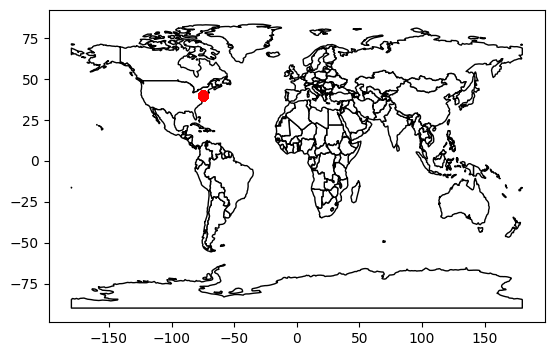

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


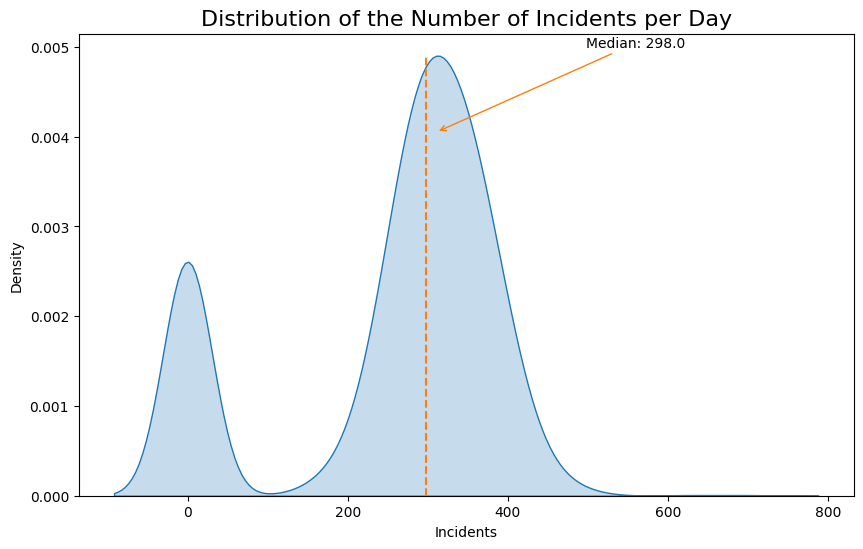

In [ ]:
col = sns.color_palette()

# Calculate the date and hour
train['Date'] = train.dispatch_date.dt.date
train['Hour'] = train.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [ ]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
train['weekday'] = train['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
train['weekday'] = train['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
train


the_geom  cartodb_id  \
413245  0101000020E61000005BFC3B158FCC52C066AF0CE4B8F7...   1231100.0   
348883  0101000020E6100000EB302E6E46CB52C069AAE5D6BDFB...    258162.0   
695990                                                NaN         NaN   
174918  0101000020E61000004C23A0A183C852C0A405A206D705...    162216.0   
12797   0101000020E6100000F094066577C952C04DAC009DD1FB...    767129.0   
...                                                   ...         ...   
259178  0101000020E610000090F1ACCDD4C752C0B4809E40B701...   1143005.0   
365838  0101000020E61000004A2E18BF1DC952C02DC2A08E3F01...    277132.0   
131932  0101000020E61000001E21DAF944C852C0DCE9B5762EFC...   3132693.0   
671155                                                NaN         NaN   
121958  0101000020E610000023ECE3BA0CC452C0E73B955F4806...   3122719.0   

                                     the_geom_webmercator  objectid  dc_dist  \
413245  0101000020110F0000683E23989DEE5FC1FB28E442B986...   1242195       17   
348883  0101000020110F0000044248586FEC5FC12989CC382D8B...    263500        9   
695990                                                NaN   1383824        1   
174918  0101000020110F000036BF8AC6BEE75FC1E73133A25F96...    161645       35   
12797   0101000020110F0000122AFFD45CE95FC1B0675C22438B...    781450       26   
...                                                   ...       ...      ...   
259178  0101000020110F0000BBA50ED095E65FC13407FB9BCC91...   1157842       25   
365838  0101000020110F000029A53A8EC4E85FC1F913F8E14791...    256923       25   
131932  0101000020110F000001685F5954E75FC175866007AA8B...   9007883       26   
671155                                                NaN   1360355        2   
121958  0101000020110F0000FDF3527129E05FC1A4842163DD96...   9024796        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
413245   2  2021-07-19 20:27:00+00    2021-07-19      16:27:00  16.0  ...   
348883   3  2021-02-23 19:55:00+00    2021-02-23      14:55:00  14.0  ...   
695990   1  2019-02-13 17:32:00+00    2019-02-13      12:32:00  12.0  ...   
174918   1  2022-08-11 16:23:00+00    2022-08-11      12:23:00  12.0  ...   
12797    2  2023-03-10 03:40:00+00    2023-03-09      22:40:00  22.0  ...   
...     ..                     ...           ...           ...   ...  ...   
259178   2  2022-08-19 18:00:00+00    2022-08-19      14:00:00  13.0  ...   
365838   1  2021-09-22 15:48:00+00    2021-09-22      11:48:00  11.0  ...   
131932   3  2023-10-03 03:18:00+00    2023-10-02      23:18:00   NaN  ...   
671155   1  2019-12-30 07:39:00+00    2019-12-30      02:39:00   2.0  ...   
121958   3  2023-09-30 22:04:00+00    2023-09-30      18:04:00   NaN  ...   

                     location_block ucr_general  \
413245         1400 BLOCK S NAPA ST        1100   
348883        2300 BLOCK WALLACE ST         600   
695990        1900 BLOCK OREGON AVE        1100   
174918     6100 BLOCK N FRANKLIN ST         600   
12797       900 BLOCK N Marshall St         600   
...                             ...         ...   
259178  300 BLOCK E HUNTING PARK AV        1700   
365838          3700 BLOCK N 9TH ST         400   
131932           1100 BLOCK EARL ST         700   
671155        6100 BLOCK CASTOR AVE        2600   
121958        2100 BLOCK COTTMAN AV         600   

                                       Category          X          Y  \
413245                                    Fraud -75.196233  39.935330   
348883                                   Thefts -75.176174  39.966731   
695990                                    Fraud -75.179289  39.917915   
174918                       Theft from Vehicle -75.133034  40.045625   
12797                        Theft from Vehicle -75.147912  39.967334   
...                                         ...        ...        ...   
259178  Other Sex Offenses (Not Commercialized) -75.122363  40.013405   
365838            Aggravated Assault No Firearm -75.142441  40.009752   
131932          

In [ ]:
data = train.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
data

weekday
Monday       71279
Tuesday      72129
Wednesday    71823
Thursday     67944
Friday       66334
Saturday     59185
Sunday       56307
Name: the_geom, dtype: int64

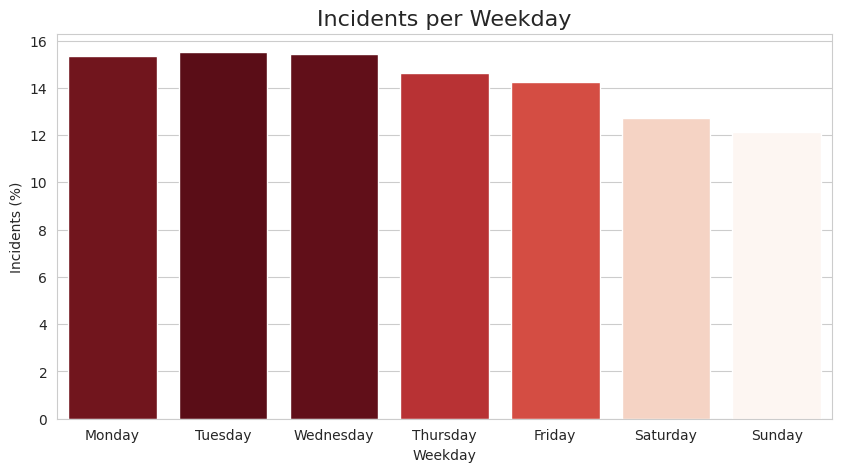

In [ ]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x = data.index,  # X-axis data (weekdays)
        y = (data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


In [ ]:
train

the_geom  cartodb_id  \
413245  0101000020E61000005BFC3B158FCC52C066AF0CE4B8F7...   1231100.0   
348883  0101000020E6100000EB302E6E46CB52C069AAE5D6BDFB...    258162.0   
695990                                                NaN         NaN   
174918  0101000020E61000004C23A0A183C852C0A405A206D705...    162216.0   
12797   0101000020E6100000F094066577C952C04DAC009DD1FB...    767129.0   
...                                                   ...         ...   
259178  0101000020E610000090F1ACCDD4C752C0B4809E40B701...   1143005.0   
365838  0101000020E61000004A2E18BF1DC952C02DC2A08E3F01...    277132.0   
131932  0101000020E61000001E21DAF944C852C0DCE9B5762EFC...   3132693.0   
671155                                                NaN         NaN   
121958  0101000020E610000023ECE3BA0CC452C0E73B955F4806...   3122719.0   

                                     the_geom_webmercator  objectid  dc_dist  \
413245  0101000020110F0000683E23989DEE5FC1FB28E442B986...   1242195       17   
348883  0101000020110F0000044248586FEC5FC12989CC382D8B...    263500        9   
695990                                                NaN   1383824        1   
174918  0101000020110F000036BF8AC6BEE75FC1E73133A25F96...    161645       35   
12797   0101000020110F0000122AFFD45CE95FC1B0675C22438B...    781450       26   
...                                                   ...       ...      ...   
259178  0101000020110F0000BBA50ED095E65FC13407FB9BCC91...   1157842       25   
365838  0101000020110F000029A53A8EC4E85FC1F913F8E14791...    256923       25   
131932  0101000020110F000001685F5954E75FC175866007AA8B...   9007883       26   
671155                                                NaN   1360355        2   
121958  0101000020110F0000FDF3527129E05FC1A4842163DD96...   9024796        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
413245   2  2021-07-19 20:27:00+00    2021-07-19      16:27:00  16.0  ...   
348883   3  2021-02-23 19:55:00+00    2021-02-23      14:55:00  14.0  ...   
695990   1  2019-02-13 17:32:00+00    2019-02-13      12:32:00  12.0  ...   
174918   1  2022-08-11 16:23:00+00    2022-08-11      12:23:00  12.0  ...   
12797    2  2023-03-10 03:40:00+00    2023-03-09      22:40:00  22.0  ...   
...     ..                     ...           ...           ...   ...  ...   
259178   2  2022-08-19 18:00:00+00    2022-08-19      14:00:00  13.0  ...   
365838   1  2021-09-22 15:48:00+00    2021-09-22      11:48:00  11.0  ...   
131932   3  2023-10-03 03:18:00+00    2023-10-02      23:18:00   NaN  ...   
671155   1  2019-12-30 07:39:00+00    2019-12-30      02:39:00   2.0  ...   
121958   3  2023-09-30 22:04:00+00    2023-09-30      18:04:00   NaN  ...   

                     location_block ucr_general  \
413245         1400 BLOCK S NAPA ST        1100   
348883        2300 BLOCK WALLACE ST         600   
695990        1900 BLOCK OREGON AVE        1100   
174918     6100 BLOCK N FRANKLIN ST         600   
12797       900 BLOCK N Marshall St         600   
...                             ...         ...   
259178  300 BLOCK E HUNTING PARK AV        1700   
365838          3700 BLOCK N 9TH ST         400   
131932           1100 BLOCK EARL ST         700   
671155        6100 BLOCK CASTOR AVE        2600   
121958        2100 BLOCK COTTMAN AV         600   

                                       Category          X          Y  \
413245                                    Fraud -75.196233  39.935330   
348883                                   Thefts -75.176174  39.966731   
695990                                    Fraud -75.179289  39.917915   
174918                       Theft from Vehicle -75.133034  40.045625   
12797                        Theft from Vehicle -75.147912  39.967334   
...                                         ...        ...        ...   
259178  Other Sex Offenses (Not Commercialized) -75.122363  40.013405   
365838            Aggravated Assault No Firearm -75.142441  40.009752   
131932          

In [ ]:
data = train.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))
data

Category
Thefts                                     91297
Other Assaults                             77074
Vandalism/Criminal Mischief                47388
Theft from Vehicle                         42079
All Other Offenses                         41326
Motor Vehicle Theft                        34743
Fraud                                      25402
Aggravated Assault No Firearm              16384
Narcotic / Drug Law Violations             12589
Burglary Residential                       11783
Aggravated Assault Firearm                 11329
Weapon Violations                          10734
Robbery No Firearm                          8583
Robbery Firearm                             7836
Burglary Non-Residential                    6953
DRIVING UNDER THE INFLUENCE                 3978
Other Sex Offenses (Not Commercialized)     2867
Receiving Stolen Property                   2414
Rape                                        2154
Arson                                       1857
Disorderly Conduct                          1454
Homicide - Criminal                         1374
Offenses Against Family and Children         902
Forgery and Counterfeiting                   835
Embezzlement                                 629
Prostitution and Commercialized Vice         612
Liquor Law Violations                        229
Public Drunkenness                           146
Vagrancy/Loitering                            24
Gambling Violations                           19
Homicide - Justifiable                         6
Homicide - Gross Negligence                    1
Name: the_geom, dtype: int64

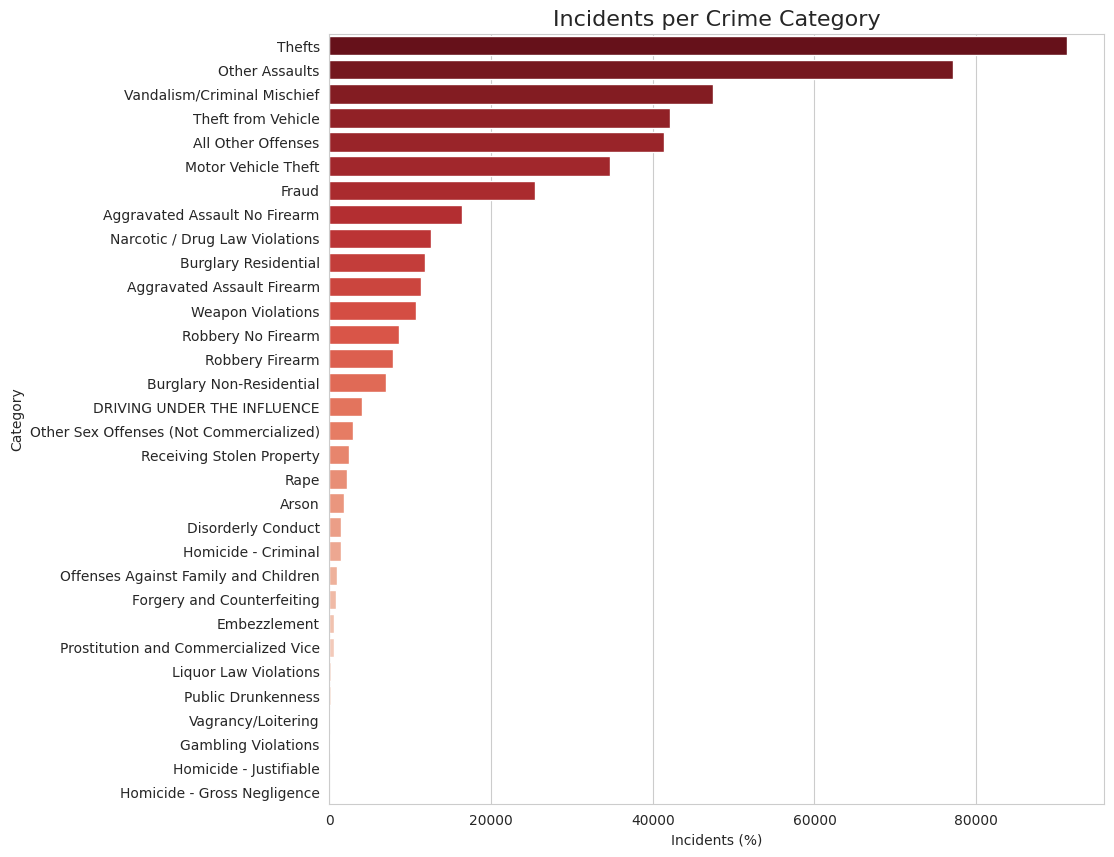

In [ ]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()


# **Visualization**

Police Districts

<Figure size 1000x1000 with 0 Axes>

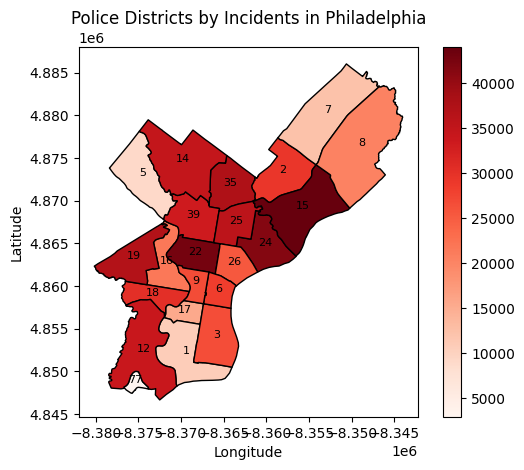

In [ ]:
# Downloading the shapefile of the area
if not os.path.exists("Boundaries_District.zip"):
    !gdown 1MreKdCXa3sUmJWjZDVUwPtqc4G_7M6Qa

# Unzipping the data
with zipfile.ZipFile('Boundaries_District.zip', 'r') as zip_ref:
    zip_ref.extractall('Boundaries_District')

# Loading into a geopandas DataFrame
for filename in os.listdir('./Boundaries_District/'):
    if filename.endswith(".shp"):
        pd_districts_philly = gpd.read_file('./Boundaries_District/'+filename)
        break
pd_districts_philly

# Defining the coordinate system to longitude/latitude
pd_districts_philly.crs={'init': 'epsg:4326'}

# Merging the dataset and converting coordinate system
pd_districts_philly = pd_districts_philly.to_crs(epsg=3857)

# Calculating the number of incidents for each police district
incident_counts = train.groupby('dc_dist').size()
pd_districts_philly['Incidents'] = pd_districts_philly['DIST_NUM'].map(incident_counts)

plt.figure(figsize=(10, 10))
ax = pd_districts_philly.plot(column='Incidents', cmap='Reds', edgecolor='black', legend=True)

# Annotate each district with its district code
for idx, row in pd_districts_philly.iterrows():
    ax.annotate(text=row['DIST_NUM'], xy=row.geometry.centroid.coords[0], horizontalalignment='center', fontsize=8)

plt.title('Police Districts by Incidents in Philadelphia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Exploratory Visualization**

In [ ]:
# Downloading the shapefile of the area
if not os.path.exists("mygeodata.zip"):
    !gdown 1tB92EpB3VdIdOMB-9KlaQFfE02YWXmd8

# Unzipping the data
with zipfile.ZipFile('mygeodata.zip', 'r') as zip_ref:
    zip_ref.extractall('mygeodata-shp')


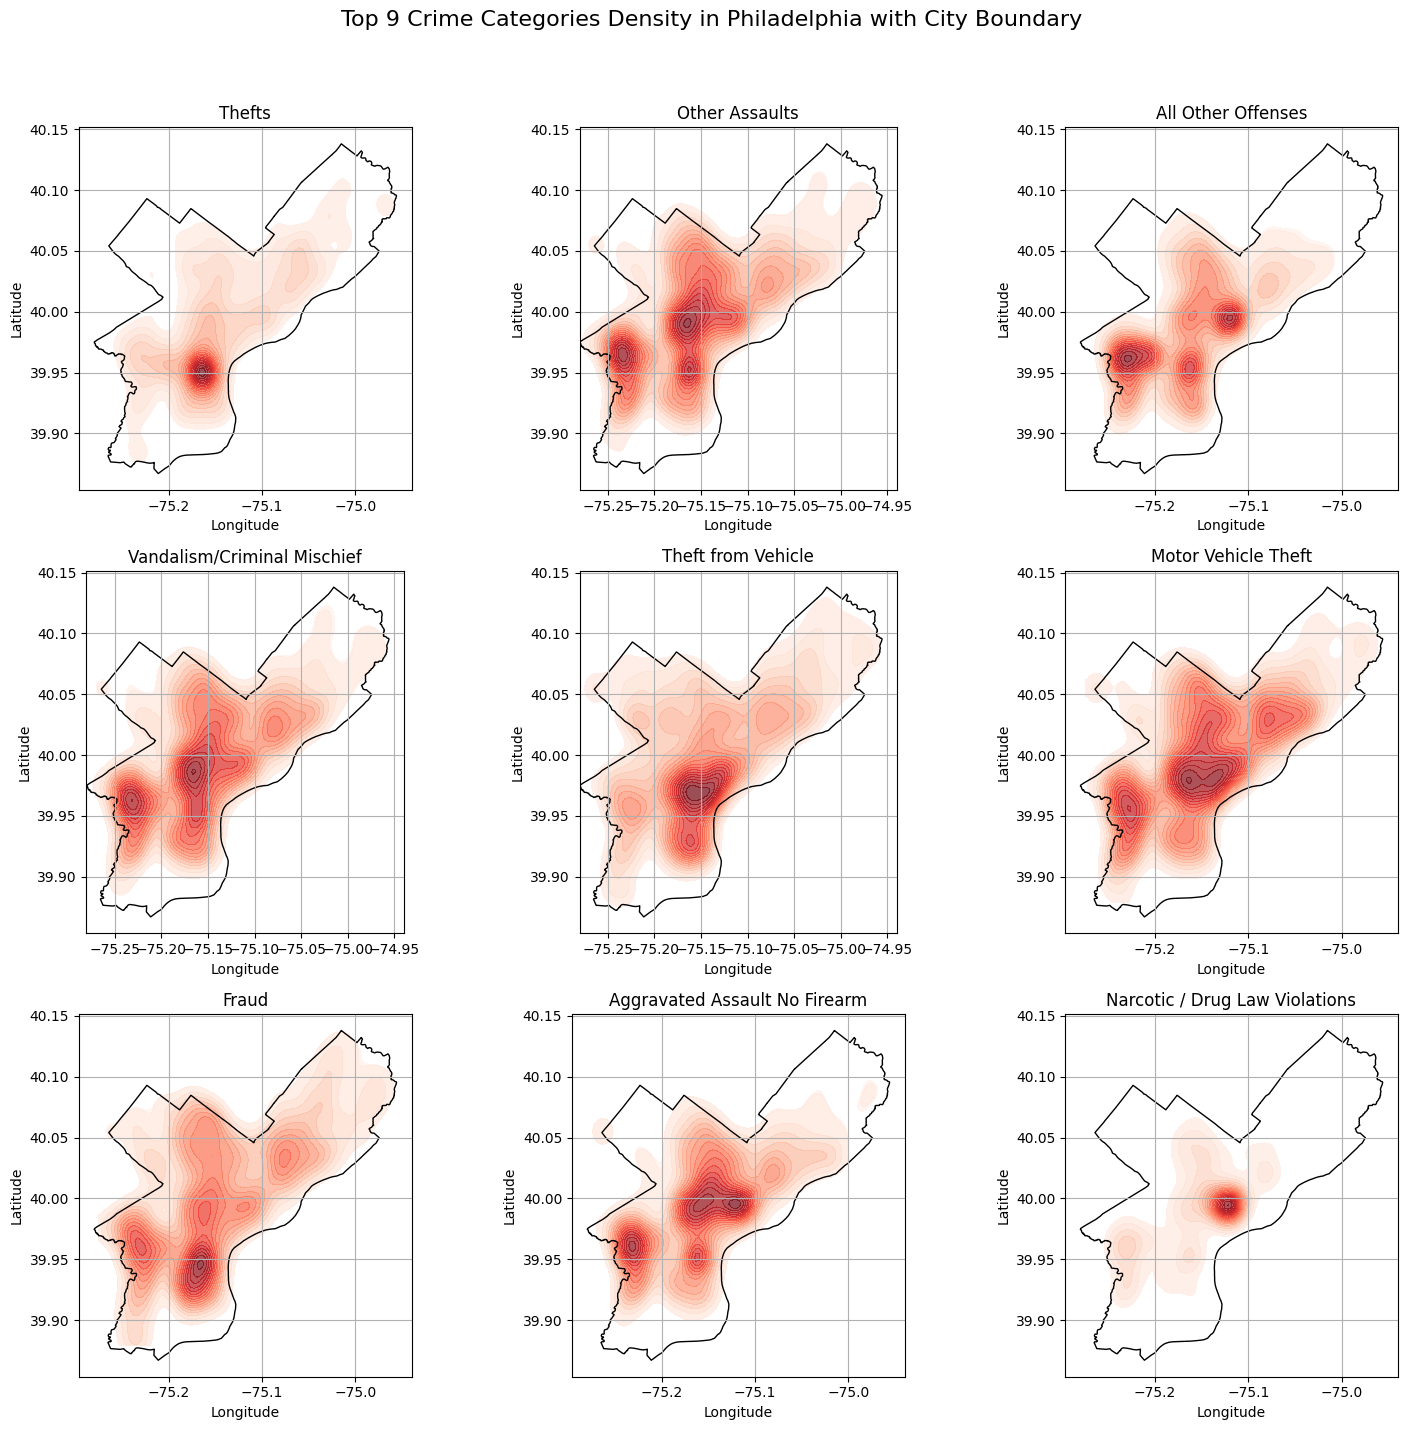

In [ ]:
from sklearn.neighbors import KernelDensity

# Get the top nine most frequent crime categories
top_categories = train['Category'].value_counts().head(9).index.tolist()

# Filter the DataFrame to include only these categories
train_top = train[train['Category'].isin(top_categories)]

# Drop rows with NaN values
train_top = train_top.dropna(subset=['X', 'Y'])

# Create a GeoDataFrame with geometry column for plotting
geometry = [Point(xy) for xy in zip(train_top['X'], train_top['Y'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(train_top, crs=crs, geometry=geometry)

# Load Philadelphia city boundary shapefile
city_boundary = gpd.read_file('mygeodata-shp/border_level6_polygon.shp')

# Set up the grid of plots
cols = 3  # Number of columns in the grid
rows = -(-len(top_categories) // cols)  # Round up division to get number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Create a colormap
cmap = 'Reds'  # Choose a colormap for density representation

# Plot density estimation for each crime category on a separate subplot
for i, category in enumerate(top_categories):
    row_idx = i // cols
    col_idx = i % cols
    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]

    category_df = geo_df[geo_df['Category'] == category]

    # Extract X and Y coordinates
    points = np.array(category_df[['X', 'Y']])

    # Perform KDE
    kde = KernelDensity(bandwidth=0.01, kernel='gaussian')
    kde.fit(points)

    # Create a grid of coordinates to evaluate KDE
    x_min, x_max = category_df['X'].min(), category_df['X'].max()
    y_min, y_max = category_df['Y'].min(), category_df['Y'].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T
    z = np.exp(kde.score_samples(xy_sample))
    z = z.reshape(xx.shape)

    # Plot KDE as a contour plot
    ax.contourf(xx, yy, z, cmap=cmap, levels=20, alpha=0.7)

    # Set background color to white where density is zero
    ax.contourf(xx, yy, z, colors='white', levels=[0, z.max()*0.05], alpha=1)

    ax.set_title(category)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

    # Plot city boundary
    city_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

    ax.set_title(category)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Hide empty subplots
if len(top_categories) < rows * cols:
    for i in range(len(top_categories), rows * cols):
        row_idx = i // cols
        col_idx = i % cols
        axes[row_idx, col_idx].axis('off')

plt.suptitle('Top 9 Crime Categories Density in Philadelphia with City Boundary', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


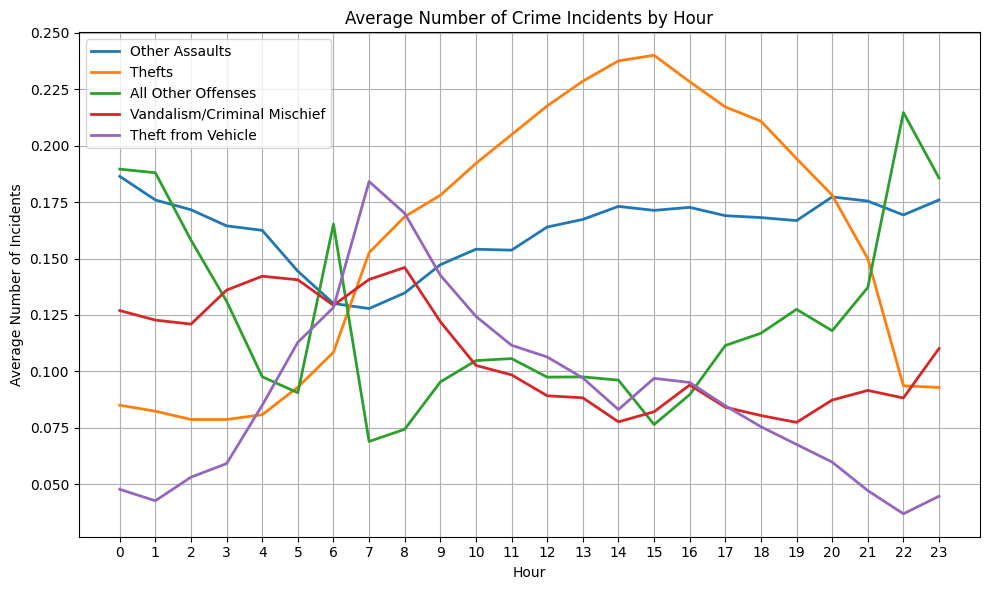

In [ ]:
# Calculate the average number of incidents for each crime category within each hour
hourly_category_avg = train.groupby(['hour', 'Category']).size().unstack().div(train.groupby('hour').size(), axis=0).fillna(0)

# Find the top five crime categories with the highest total number of incidents
top_categories = hourly_category_avg.sum().nlargest(5).index

# Plot the line chart
plt.figure(figsize=(10, 6))

# Plot the lines for the top five crime categories with the highest total number of incidents
for category in top_categories:
    plt.plot(hourly_category_avg.index, hourly_category_avg[category], label=category, linewidth=2)

plt.title('Average Number of Crime Incidents by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of Incidents')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
